# Example of Landsat 8 bands

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from functions import load_scene

## Load the scene

Load the pre-cropped scene for plotting.

In [2]:
liverpool = load_scene(
    Path("../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/"),
    pattern="[0-9]*",
)
liverpool_pan = load_scene(
    Path("../data/liverpool/LC08_L1TP_204023_20200927_20201006_02_T1_cropped/"),
    pattern="[8]",
)

## Plot all bands in a scene

To ilustrate their differences and sensitivities.

In [3]:
band_names = {
    1: "Aerosol",
    2: "Blue",
    3: "Green",
    4: "Red",
    5: "NIR",
    6: "SWIR 1",
    7: "SWIR 2",
    10: "Thermal",
}

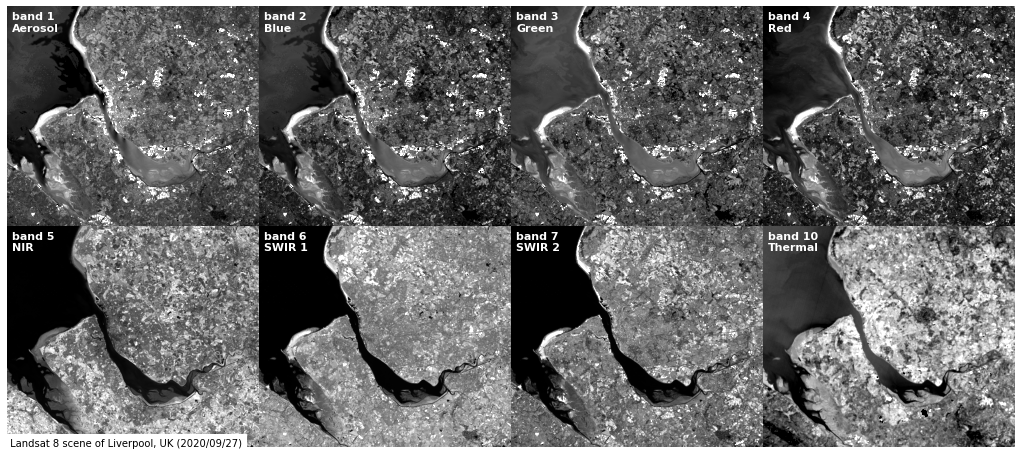

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6.15))
for ax, band in zip(axes.ravel(), [1, 2, 3, 4, 5, 6, 7, 10]):    
    vmin, vmax = np.percentile(liverpool[band], (2, 98))
    ax.imshow(liverpool[band], cmap="gray", vmin=vmin, vmax=vmax)
    ax.axis("off")
    ax.text(
        30, 30, 
        f"band {band}\n{band_names[band]}", 
        color="white", 
        fontweight="bold", 
        fontsize=11,
        verticalalignment="top",
    )
fig.text(0, 0, 
    " Landsat 8 scene of Liverpool, UK (2020/09/27)", 
    color="black", 
    fontweight="normal", 
    fontsize=10,
    verticalalignment="bottom",
    backgroundcolor="white",
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("../lectures/images/landsat8-bands-liverpool.svg", bbox_inches="tight", pad_inches=0)